In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from datetime import datetime
import fix_yahoo_finance as yf
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns; sns.set()
import pandas as pd
import scipy.signal
import statsmodels.api as sm
import sys
class report(object):
    def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
        yf.pdr_override()        
        stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
        return stocks_yahoo
    def google(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
        stocks_google = pdr.DataReader(symbols, 'google', start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day))
        return  stocks_google       
    def grafic_01(stock,symbols,i):
            fig=plt.figure();
            stock_return = stock['Adj Close'].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=symbols[i]);
            plt.ylabel("Volatilidade [%]")
            stock.iloc[:,5].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Volume')
            fig.tight_layout()
            plt.grid(False)
            pass
    def grafic_02(stock,symbols,i):
            fig=plt.figure();
            ax = fig.add_subplot(111)
            stock_return=100*stock['Adj Close'].pct_change()
            stock_return.hist(bins=len(stock), color='c')
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=2)            
            plt.title(symbols[i]+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '+str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("No de Eventos", fontsize=12)
            fig.tight_layout()
            return stock_return.mean(), stock_return.std()
    def grafic_03(stock,IBOV,symbols,i):
            stock_close_return=100*stock['Adj Close'].pct_change()
            stock_IBOV_close_return=100*IBOV['Adj Close'].pct_change()
            
            dfret=pd.concat([ stock_close_return, stock_IBOV_close_return], axis=1)
            dfmret = dfret.dropna()
            X = sm.add_constant(dfmret.iloc[:,1])
            y = dfmret.iloc[:,0]
            model = sm.OLS(y,X).fit()
            beta = model.params["Adj Close"]
            alpha = model.params["const"]
            rsqr = model.rsquared
            fig, ax1 = plt.subplots(1,figsize=(10,6))
            ax1.scatter(dfmret.iloc[:,1],dfmret.iloc[:,0],label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário IBOV [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário do Ativo [%]", fontsize=16)
            line_x = np.linspace(dfmret.iloc[:,1].min(), dfmret.iloc[:,1].max())
            ax1.plot(line_x, line_x*model.params["Adj Close"], color="red", label="Beta")
            ax1.legend(loc='upper center', ncol=2, fontsize='large')
            plt.title(symbols[i]+': beta = '+str(round(beta,2))+', '+'alpha = '+str(round(alpha,2))+' e '+'r² = '+str(round(rsqr,2)),fontsize=20)  
            return beta
    def grafic_04(IBOV, stock,symbols,i):
            fig, ax = plt.subplots()
            price=stock['Adj Close']
            price_N=10000*price/price.iloc[0]
            price_N.plot()
            IBOVC=IBOV['Adj Close']
            IBOV_N=10000*IBOVC/IBOVC.iloc[0]
            price_all=pd.concat([ IBOV_N, price_N], axis=1)
            price_all.columns=['IBOV',symbols[i][0:5]]
            price_all.plot(ax=ax)
            plt.title("Capital final de R\$" + str(np.round(price_N.iloc[-1:][0],2)) + " ao investir R\$10.000,00 em "+str((stock.index[-1]-stock.index[0])/30)[0:2]+" meses")
            plt.ylabel('Varação do Capital em Reais [R$]')
            stock.iloc[:,5].plot(x_compat=True, secondary_y=True, style='w--', label='Volume');
            ax.right_ax.set_ylabel('Volume')
            pass
    def grafic_05(index_stock,symbols,i):
   #         fig=plt.figure();
            corr_matrix = index_stock.corr()
            sns.set()
            corr_matrix.plot(kind='bar')
            plt.xticks(rotation=45)
            plt.title(symbols[i],fontsize=20)  
            plt.ylabel("Magnitude da Correlação [0-1]")
            plt.grid()
            pass
    def bovespa_stock():
        symbols_stock=['PETR3','VALE3']
        return symbols_stock
    def bovespa_index():
        symbols_index=['^BVSP', 'SMLL','ICON' ]        
        return symbols_index

In [57]:
symbols=report.bovespa_stock()
symbols=[symbols[x]+'.SA' for x in range(len(symbols))]

N_months=36
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year


stocks=report.yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks.head()

[*********************100%***********************]  2 of 2 downloaded

Open                High                 Low             \
           PETR3.SA   VALE3.SA PETR3.SA   VALE3.SA PETR3.SA   VALE3.SA   
Date                                                                     
2015-10-13    10.23  19.969999    10.33  20.000000     9.78  18.549999   
2015-10-14     9.76  18.700001    10.00  19.170000     9.50  18.600000   
2015-10-15     9.68  18.860001     9.71  19.049999     9.23  18.430000   
2015-10-16     9.65  18.860001     9.87  18.860001     9.43  18.200001   
2015-10-19     9.69  18.410000     9.71  18.549999     9.43  17.709999   

              Close            Adj Close               Volume            
           PETR3.SA   VALE3.SA  PETR3.SA   VALE3.SA  PETR3.SA  VALE3.SA  
Date                                                                     
2015-10-13     9.84  18.580000  9.801189  16.662853  17862500   8803000  
2015-10-14     9.56  18.700001  9.522295  16.770472  29349200  13342500  
2015-10-15     9.66  18.969999  9.621900  17.012611  14049600   5301300  
2015-10-16     9.70  18.420000  9.661741  16.851244  11176500   5306400  
2015-10-19     9.67  17.799999  9.631861  16.284048  11924800   6646700

In [3]:
symbolsI=report.bovespa_index()

N_months=36
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year


index=report.yahoo(symbolsI,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
index.head()


[*********************100%***********************]  3 of 3 downloaded

Open                       High                        Low  \
             ICON       SMLL    ^BVSP   ICON       SMLL    ^BVSP   ICON   
Date                                                                      
2015-10-12  15.75  30.530001      NaN  15.75  30.530001      NaN  14.88   
2015-10-13  15.13  30.530001  49339.0  15.76  30.530001  49339.0  14.96   
2015-10-14  15.26  30.530001  47349.0  15.60  30.530001  47715.0  15.26   
2015-10-15  15.58  30.530001  46730.0  15.90  30.530001  47188.0  15.33   
2015-10-16  15.89  30.530001  47161.0  16.09  30.530001  47727.0  15.66   

                                Close                     Adj Close  \
                 SMLL    ^BVSP   ICON       SMLL    ^BVSP      ICON   
Date                                                                  
2015-10-12  30.530001      NaN  15.14  30.530001      NaN     15.14   
2015-10-13  30.530001  47135.0  15.29  30.530001  47363.0     15.29   
2015-10-14  30.530001  46701.0  15.47  30.530001  46710.0     15.47   
2015-10-15  30.530001  46321.0  15.89  30.530001  47161.0     15.89   
2015-10-16  30.530001  46517.0  16.02  30.530001  47236.0     16.02   

                                  Volume                  
                 SMLL    ^BVSP      ICON SMLL      ^BVSP  
Date                                                      
2015-10-12  28.080494      NaN  721400.0  0.0        NaN  
2015-10-13  28.080494  47363.0  724500.0  0.0  4221100.0  
2015-10-14  28.080494  46710.0  548800.0  0.0  6141700.0  
2015-10-15  28.080494  47161.0  866400.0  0.0  3653000.0  
2015-10-16  28.080494  47236.0  813200.0  0.0  3537700.0

In [58]:
k=0
stock=pd.concat([ stocks.Open[symbols[k]], stocks.High[symbols[k]], stocks.Low[symbols[k]],stocks.Close[symbols[k]], stocks['Adj Close'][symbols[k]], 
              stocks.Volume[symbols[k]]] , axis=1)  
stock.columns=['Open','High','Low','Close','Adj Close','Volume']
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-13,10.23,10.33,9.78,9.84,9.801189,17862500
2015-10-14,9.76,10.00,9.50,9.56,9.522295,29349200
2015-10-15,9.68,9.71,9.23,9.66,9.621900,14049600
2015-10-16,9.65,9.87,9.43,9.70,9.661741,11176500
2015-10-19,9.69,9.71,9.43,9.67,9.631861,11924800


<IPython.core.display.Javascript object>


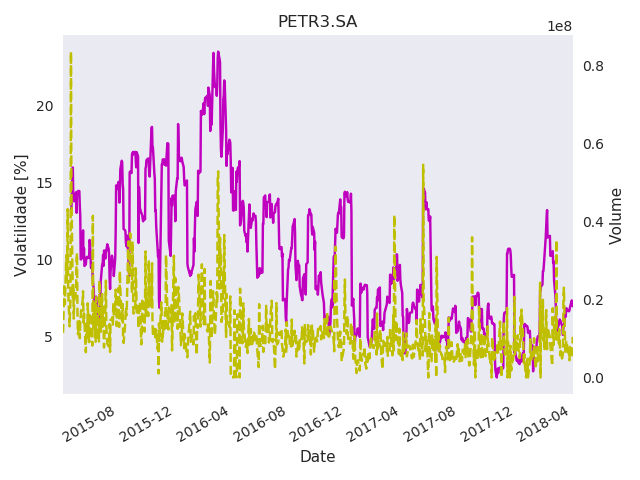

In [5]:
%matplotlib notebook 
report.grafic_01(stock,symbols,k)

<IPython.core.display.Javascript object>


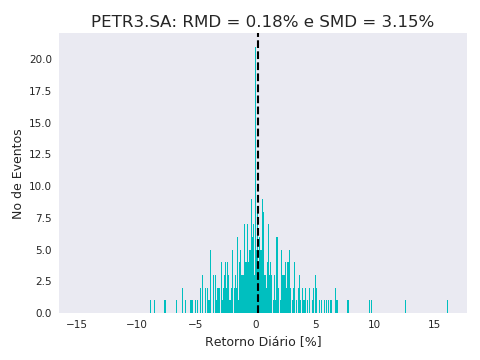

(0.18355780749831843, 3.1450276514462456)

In [59]:
%matplotlib notebook 
report.grafic_02(stock,symbols,k)

In [60]:
k=0
IBOV=pd.concat([ index.Open[symbolsI[k]], index.High[symbolsI[k]], index.Low[symbolsI[k]],index.Close[symbolsI[k]], 
                index['Adj Close'][symbolsI[k]],index.Volume[symbolsI[k]]] , axis=1)  
IBOV.columns=['Open','High','Low','Close','Adj Close','Volume']
IBOV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-13,49339.0,49339.0,47135.0,47363.0,47363.0,4221100.0
2015-10-14,47349.0,47715.0,46701.0,46710.0,46710.0,6141700.0
2015-10-15,46730.0,47188.0,46321.0,47161.0,47161.0,3653000.0
2015-10-16,47161.0,47727.0,46517.0,47236.0,47236.0,3537700.0


<IPython.core.display.Javascript object>


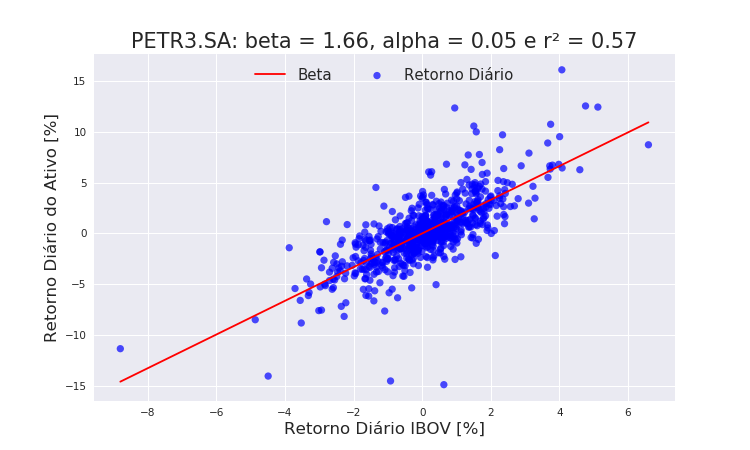

1.661522981229379

In [61]:
%matplotlib notebook 
report.grafic_03(stock,IBOV,symbols,k)
    

<IPython.core.display.Javascript object>


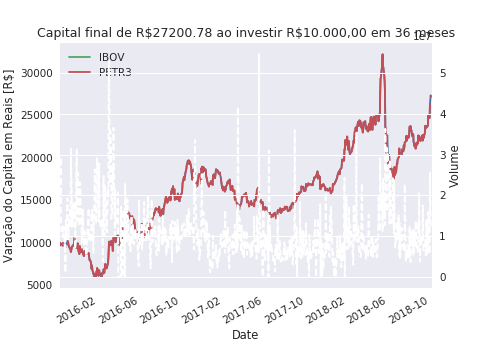

In [62]:
%matplotlib notebook 
report.grafic_04(IBOV, stock,symbols,k)


In [63]:
index_stock=pd.concat([stocks['Adj Close'][symbols[0]], index['Adj Close'][symbolsI[0]],index['Adj Close'][symbolsI[1]],
                      index['Adj Close'][symbolsI[2]]] , axis=1)  

#index_stock=pd.concat([Close[symbols[i]],Close_index] , axis=1)

index_stock.head()

#grafic_05(index_stock,symbols,i)

,PETR3.SA,^BVSP,SMLL,ICON
Date,,,,
2015-10-12,NaN,NaN,28.080494,15.14
2015-10-13,9.801189,47363.0,28.080494,15.29
2015-10-14,9.522295,46710.0,28.080494,15.47
2015-10-15,9.621900,47161.0,28.080494,15.89
2015-10-16,9.661741,47236.0,28.080494,16.02


<IPython.core.display.Javascript object>


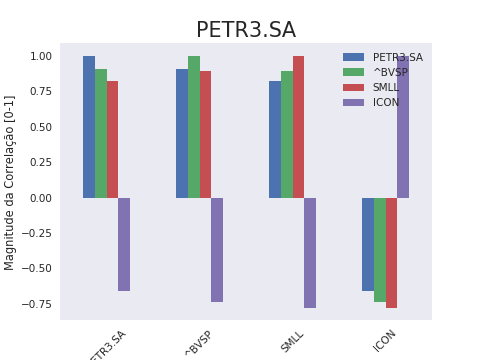

In [64]:
%matplotlib notebook 
report.grafic_05(index_stock,symbols,k)
#corr_matrix = index_stock.corr()
#sns.set()
#corr_matrix.plot(kind='bar')


In [65]:
table = pd.read_html("http://www.fundamentus.com.br/detalhes.php?papel=AALR3")
pd.DataFrame(table)[0][2][pd.DataFrame(table)[0][2].columns[2:6]]


,2,3,4,5
0,NaN,NaN,NaN,NaN
1,?P/L,15456,?LPA,008
2,?P/VP,116,?VPA,1045
3,?P/EBIT,1318,?Marg. Bruta,"28,0%"
4,?PSR,132,?Marg. EBIT,"10,0%"
5,?P/Ativos,063,?Marg. Líquida,"1,7%"
6,?P/Cap. Giro,30608,?EBIT / Ativo,"4,8%"
7,?P/Ativ Circ Liq,-248,?ROIC,"5,1%"
8,?Div. Yield,"0,0%",?ROE,"0,8%"
9,?EV / EBIT,1820,?Liquidez Corr,101


In [55]:
from pytrends.request import TrendReq


ImportError: No module named 'pytrends'

In [53]:
--version

NameError: name 'version' is not defined